In [1]:
from LeNet import LeNet
from keras.optimizers import SGD, RMSprop, Adam

NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT=0.2
IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
NB_CLASSES = 10 # number of outputs = number of digits
INPUT_SHAPE = (1, IMG_ROWS, IMG_COLS)


Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
from keras import backend as k

from keras.utils import np_utils
import numpy as np

# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
k.set_image_dim_ordering("th")
# consider them as float and normalize
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
# we need a 60K x [1 x 28 x 28] shape as input to the CONVNET
X_train = X_train[:, np.newaxis, :, :]
X_test = X_test[:, np.newaxis, :, :]
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, NB_CLASSES)
y_test = np_utils.to_categorical(y_test, NB_CLASSES)


60000 train samples
10000 test samples


In [3]:
# initialize the optimizer and model
model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
model.compile(
    loss="categorical_crossentropy", 
    optimizer=OPTIMIZER,
    metrics=["accuracy"])

/media/newhd5/Bram-Workspace/onlineCourses/keras/Part3-ConvNets/LeNet.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=50, kernel_size=5, padding="same")`
  border_mode = "same"))


In [4]:
history = model.fit(
    X_train, y_train,
    batch_size=BATCH_SIZE, 
    epochs=NB_EPOCH,
    verbose=VERBOSE, 
    validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 16s 339us/step - loss: 0.1892 - acc: 0.9422 - val_loss: 0.0647 - val_acc: 0.9799
Epoch 2/20
48000/48000 [==============================] - 8s 165us/step - loss: 0.0479 - acc: 0.9851 - val_loss: 0.0395 - val_acc: 0.9877
Epoch 3/20
48000/48000 [==============================] - 8s 165us/step - loss: 0.0333 - acc: 0.9893 - val_loss: 0.0394 - val_acc: 0.9880
Epoch 4/20
48000/48000 [==============================] - 8s 165us/step - loss: 0.0224 - acc: 0.9929 - val_loss: 0.0474 - val_acc: 0.9858
Epoch 5/20
48000/48000 [==============================] - 8s 166us/step - loss: 0.0161 - acc: 0.9948 - val_loss: 0.0448 - val_acc: 0.9876
Epoch 6/20
48000/48000 [==============================] - 8s 166us/step - loss: 0.0143 - acc: 0.9950 - val_loss: 0.0440 - val_acc: 0.9876
Epoch 7/20
48000/48000 [==============================] - 8s 165us/step - loss: 0.0135 - acc: 0.9955 - val_loss: 0.0514 -

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


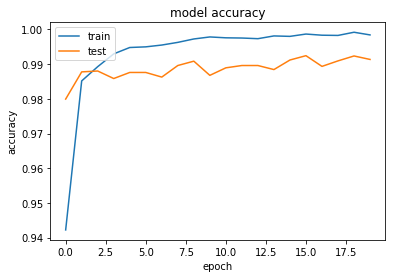

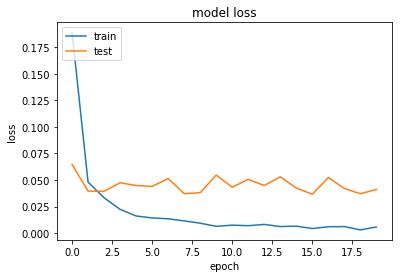

In [6]:
import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()